"Object Detection with Pretrained YOLO on Fruit Dataset"

This notebook demonstrates the implementation of object detection using a pretrained YOLO (You Only Look Once) model on a dataset containing various fruits. The program utilizes the YOLO model to identify and draw bounding boxes around multiple objects in an image, showcasing its capability for accurate and efficient object localization. The resulting images provide a visual representation of the detected fruits, highlighting the practical application of YOLO in real-world scenarios.

In [ ]:
!pip install wandb
import wandb
import os
import yaml
from shutil import copytree, ignore_patterns
import xml.etree.ElementTree as ET

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.6/215.6 kB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.2 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=d535d0b59dc6a08ebf2ddfe2443313d4591f7e5f2b99e39310d2c37d39fe0eb2
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


In [ ]:
root_path = '/content/drive/MyDrive/Fruit_dataset/'
os.listdir(root_path)

['train_zip', 'test_zip']

In [ ]:
train_data_path = os.path.join(root_path,'train_zip/train')
test_data_path = os.path.join(root_path,'test_zip/test')

In [ ]:
train_data_description = os.listdir(train_data_path)
test_data_description = os.listdir(test_data_path)

In [ ]:
train_annotation_file_paths = [os.path.join(train_data_path,i) for i in train_data_description if '.xml' in i]
train_image_file_paths = [os.path.join(train_data_path,i) for i in train_data_description if '.jpg' in i]

test_annotation_file_paths = [os.path.join(test_data_path,i) for i in test_data_description if '.xml' in i]
test_image_file_paths = [os.path.join(test_data_path,i) for i in test_data_description if '.jpg' in i]

In [ ]:
print(f'length of training Data {len(train_image_file_paths)}, length of test data {len(test_image_file_paths)}')

length of training Data 240, length of test data 60


In [1]:
for i in ['train/labels','test/labels']:
    os.makedirs(os.path.join('/content/drive/MyDrive/Colab Notebooks/yolov5fd/',i))

In [ ]:
copytree(train_data_path,'/content/drive/MyDrive/Colab Notebooks/yolov5fd/train/images/',ignore = ignore_patterns('*.xml'))
copytree(test_data_path,'/content/drive/MyDrive/Colab Notebooks/yolov5fd/test/images/',ignore = ignore_patterns('*.xml'))

'/content/drive/MyDrive/Colab Notebooks/yolov5fd/test/images/'

In [ ]:
def convert_xml_to_txt(label_path,xml_file,class_dict,destination_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    x=root.find('filename').text
    txt_file = x.replace('.jpg','.txt')
    txt_file = os.path.join(destination_file,txt_file)
    with open(txt_file,'w') as f:
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            if class_name not in class_dict:
                continue
            class_id = class_dict[class_name]
            bbox = obj.find('bndbox')
            xmin = int(bbox.find('xmin').text)
            xmax = int(bbox.find('xmax').text)
            ymin = int(bbox.find('ymin').text)
            ymax = int(bbox.find('ymax').text)

            image_width = int(root.find('size/width').text)
            image_height = int(root.find('size/height').text)

            x_center = (xmin + xmax) / 2 / image_width if image_width != 0 else (xmin + xmax) / 2
            y_center = (ymin + ymax) / 2 / image_height if image_height != 0 else (ymin + ymax) / 2
            width = (xmax - xmin) / image_width if image_width != 0 else (xmax - xmin)
            height = (ymax - ymin) / image_height if image_height != 0 else (ymax - ymin)

            line = f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n"
            f.write(line)

In [ ]:
class_dict = {'apple':0,'banana':1,'orange':2}


dest_path = '/content/drive/MyDrive/Colab Notebooks/yolov5fd/train/labels/'
for i in train_annotation_file_paths:
    convert_xml_to_txt(train_data_path,i,class_dict,dest_path)


dest_path = '/content/drive/MyDrive/Colab Notebooks/yolov5fd/test/labels/'
for i in test_annotation_file_paths:
    convert_xml_to_txt(test_data_path,i,class_dict,dest_path)

In [ ]:
yaml_path = "/content/drive/MyDrive/Colab Notebooks/yolov5fd/yaml_data.yaml"

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO
model = YOLO('yolov8n.yaml')

In [ ]:
wandb.login(key='e7b11f3f4075f60bd707bbdb5321d3da7e5c3eac')

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
results = model.train(data=yaml_path, epochs=50, batch=4)

Ultralytics YOLOv8.0.143 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/Colab Notebooks/yolov5fd/yaml_data.yaml, epochs=50, patience=50, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, opt

AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
100%|██████████| 6.23M/6.23M [00:00<00:00, 77.9MB/s]
WARNING ⚠️ NMS time limit 0.550s exceeded
AMP: checks passed ✅
train: Scanning /content/drive/MyDrive/Colab Notebooks/yolov5fd/train/labels... 240 images, 0 backgrounds, 33 corrupt: 100%|██████████| 240/240 [00:01<00:00, 236.93it/s]
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/yolov5fd/train/images/apple_1.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      169.5         182         323         334]
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/yolov5fd/train/images/apple_17.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [        348         479         470         442]
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/yolov5fd/train/images/apple_20.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      240.5         276         435         4

In [ ]:
import cv2
import matplotlib.pyplot as plt
Test_image_results = model('/content/drive/MyDrive/Colab Notebooks/yolov5fd/test/images/mixed_21.jpg')
'''Load the image'''
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/yolov5fd/test/images/mixed_21.jpg')
copy_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_dict = {0:'apple',1:'banana',2:'orange'}
'''Iterate over the bounding box predictions'''
for bbox in Test_image_results[0].boxes.data.tolist():
    x1, y1, x2, y2,confidence,label = bbox

    '''Draw rectangle'''
    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

    '''Add label'''
    cv2.putText(image, img_dict[int(label)], (int(x1), int(y1 - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
'''Convert BGR image to RGB'''
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


image 1/1 /content/drive/MyDrive/Colab Notebooks/yolov5fd/test/images/mixed_21.jpg: 448x640 2 oranges, 396.9ms
Speed: 14.0ms preprocess, 396.9ms inference, 25.7ms postprocess per image at shape (1, 3, 448, 640)


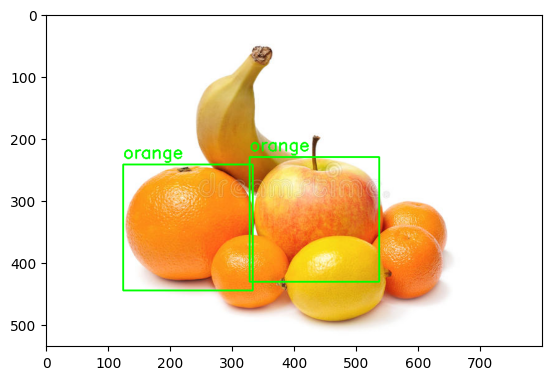

In [ ]:
plt.imshow(image_rgb)